In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,recall_score,precision_score
import matplotlib.image as mpimg
import numpy as np
import os
import pickle
import torch

In [15]:
def plot(a,b):
    x = np.arange(len(a[0]))
    plt.plot(x, a[0], color="r", linestyle="-", marker="^", label=b[0], linewidth=1)
    plt.legend(loc='lower right')
    plt.plot(x, a[1], color="b", linestyle="-", marker="s", label=b[1], linewidth=1)
    plt.legend(loc='lower right')
    plt.plot(x, a[2], color="g", linestyle="-", marker=",", label=b[2], linewidth=1)
    plt.legend(loc='lower right')
    plt.plot(x, a[3], color="m", linestyle="-", marker=".", label=b[3], linewidth=1)
    plt.legend(loc='lower right')
#     plt.plot(x, a[4], color="y", linestyle="-", marker="x", label=b[4], linewidth=1)
#     plt.legend(loc='lower right')
    plt.xlabel('data batch')
#     plt.ylabel('%')
    plt.title('Next batch prediction')

    plt.savefig('figures_next/Sensor_pic_{}_perform.jpg'.format(paramstamp),dpi=300)
    plt.show()

In [16]:
# current batch nodes
nodes = [[3, 5, 7, 18, 34, 58, 115, 115, 115, 115, 115, 115, 115, 115, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 74, 105, 105, 105, 126], [3, 5, 6, 4, 37, 160, 269, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295, 295], [3, 7, 36, 51, 74, 70, 70, 70, 70, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 56, 56, 66, 66], [3, 5, 50, 40, 40, 98, 120, 120, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140, 140], [3, 8, 21, 31, 38, 76, 77, 77, 77, 77, 77, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 70, 70, 70]]

In [25]:
# one step ahead nodes
nodes = [[3, 10, 28, 47, 47, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61],[3, 6, 12, 7, 41, 41, 96, 140, 85, 85, 85, 85, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97],[3, 8, 7, 26, 72, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 54, 54, 54, 54, 69, 69, 69, 69, 69, 69, 69],[3, 6, 6, 41, 66, 67, 99, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110],[3, 6, 4, 4, 5, 5, 46, 65, 65, 89, 89, 89, 89, 121, 121, 121, 121, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137]]

In [26]:
print(nodes)

[[3, 10, 28, 47, 47, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61], [3, 6, 12, 7, 41, 41, 96, 140, 85, 85, 85, 85, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97, 97], [3, 8, 7, 26, 72, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 54, 54, 54, 54, 69, 69, 69, 69, 69, 69, 69], [3, 6, 6, 41, 66, 67, 99, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110, 110], [3, 6, 4, 4, 5, 5, 46, 65, 65, 89, 89, 89, 89, 121, 121, 121, 121, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137, 137]]


In [27]:
ave = []
for i in range(len(nodes[0])):
    ave.append([])
    [ave[i].append(nodes[k][i]) for k in range(5)]

In [28]:
ave_ = []
for a in ave:
    ave_.append(np.mean(a))

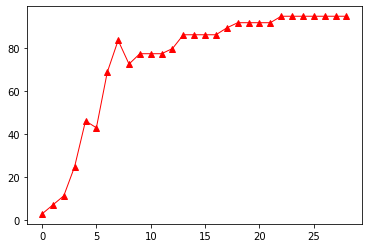

In [29]:
x = np.arange(len(ave_))
plt.plot(x, ave_, color="r", linestyle="-", marker="^", label='Nodes', linewidth=1)

In [9]:
# new data
nodes = [[2, 7, 11, 15, 15, 16, 16, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32],[2, 9, 14, 8, 23, 23, 23, 23, 23, 23, 23, 23, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67],[2, 12, 16, 20, 20, 20, 20, 20, 20, 20, 20, 20, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31],[2, 8, 10, 12, 12, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],[2, 9, 24, 55, 55, 79, 79, 79, 79, 79, 79, 79, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92],[2, 4, 22, 49, 69, 69, 69, 69, 69, 69, 69, 69, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88, 88],[2, 4, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],[2, 5, 29, 26, 47, 47, 47, 47, 47, 47, 47, 47, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62],[2, 4, 17, 56, 77, 77, 77, 77, 77, 77, 77, 77, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86, 86],[2, 7, 16, 32, 41, 41, 41, 41, 41, 41, 41, 41, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]]

In [17]:
def loadfile(filename):
    f=open(filename,'rb')
    r=pickle.load(f)
    f.close()
    return r

In [18]:
def loadresult(file,pic,metric):
    ave = [[],[],[],[],[],[]]
    racc = [[],[],[],[],[],[]]
    metrics = [[],[],[]]
    # get performance dict
    f=open(file,'rb')
    r=pickle.load(f)
    f.close()
    for i in range(len(SI)):
#         print(b[i])
#         # print('si:{} selflabel:{} flexibel:{}'.format(r['SI'][i],r['Selflabel'][i],r['Flexiblelayer'][i]))
# #         print(r['Performance'][i])
#         print(np.mean(r['Performance'][i][1:]))
        ave[i].append(np.mean(r['Performance'][i][1:]))
        racc[i].append(r['Performance'][i])
#         print(racc)
    # print('nodes:',r['Nodes'])
    result = []
    for a in ave:
        result.append(a)
#     print('acc:',result)
    [overallacc[i].append(result[i][0]) for i in range(6)]
    nodes = r['Nodes']
    [overallnode[i].append(nodes[i]) for i in range(6)]
    ### Read Images
    if os.path.isfile(pic):
        img = mpimg.imread(pic)
        plt.imshow(img)

    # get metrics dict
    m = loadfile(metric)
    performs = [[],[],[]]
    for i,key in enumerate(['F1','precision','recall']):
        for k in m:
            f = []
            for l in range(len(k)):
                f.append(k[l][key])
            performs[i].append(f)
        # plot_metrics(performs[i],b,key)
    f1result = []
    precision = []
    recall = []
    for a in range(len(SI)):
        f1result.append(np.mean(performs[0][a]))
        precision.append(np.mean(performs[1][a]))
        recall.append(np.mean(performs[2][a]))
    del a
    metrics[0] = performs[0][5]
    metrics[1] = performs[1][5]
    metrics[2] = performs[2][5]
#     print(metrics[0])
#     print('F1:',f1result)
#     print('precision:', precision)
#     print('recall:', recall)
#     print('nodes:', nodes)
#     [overallf1[i].append(f1result[i]) for i in range(6)]
#     [overallprec[i].append(precision[i]) for i in range(6)]
#     [overallrecall[i].append(recall[i]) for i in range(6)]
    return racc, metrics

In [19]:
### variables
SI         =  [False, False, True , False, True , True]
Self_label =  [False, True , True , False, True , True]
Flexible   =  [False, True , False, True , True , True]
Clustering =  [False, True , True , True , True , True]
Augment    =  [False, True , True , True , False, True]

b = ['all off', 'si off', 'evolving off', 'pseudo&si off','augment off','parsnet++']

epochs = 10
Epoch = 5
init_batch = 5              # batches for initialization of parsnet+ network
labeled_proportion = 0.5
batchSize = 50
minibatchsize = 5           # if minibatchsize=1, node growing&pruning criterion needs to be changed
noise_std = 0.001
epsilon = 0.001

### network parameters
nInputSensor = 48
classes = 3
lr = 0.01
lrGen = 0.01

### parameter stamp
paramstamp = 'init_batch{}_epochs{}_labeled{}_batchsize{}_epsilon{}_noisestd{}_lrDis{}_lrGen{}'.format(
    init_batch,epochs,labeled_proportion,batchSize,epsilon,noise_std,lr,lrGen)
# paramstamp = 'init_batch{}_epochs{}_labeled{}_batchsize{}_epsilon{}_noisestd{}_lrDis{}_lrGen{}_0.8'.format(
#     init_batch,epochs,labeled_proportion,batchSize,epsilon,noise_std,lr,lrGen)

### select random seed
seedlist = [13, 5, 15, 98, 10]
print('seed:',seedlist)
overallacc = [[],[],[],[],[],[]]
overallf1 = [[],[],[],[],[],[]]
overallprec = [[],[],[],[],[],[]]
overallrecall = [[],[],[],[],[],[]]
overallnode = [[],[],[],[],[],[]]
for e in range(len(seedlist)):
    randomseed = seedlist[e]
    print('Seed{}'.format(randomseed))
    fileName = 'results_next/Sensor_accuracy_{}-seed{}.txt'.format(paramstamp,randomseed)
    picName = 'figures_next/Sensor_pic_{}-seed{}.jpg'.format(paramstamp,randomseed)
    metricfile = 'results_next/Sensor_metrics_{}-seed{}.txt'.format(paramstamp,randomseed)
        
    if os.path.isfile(fileName):
        # print('reulst file exists')
        racc, metr = loadresult(fileName,picName,metricfile)
        if e == 0:
            overacc = torch.tensor(racc)
            overall = torch.tensor(metr)
        else:
            overacc = torch.cat((overacc,torch.tensor(racc)),dim=1)
            overall = torch.add(overall,torch.tensor(metr))

seed: [13, 5, 15, 98, 10]
Seed13
Seed5
Seed15
Seed98
Seed10


In [33]:
a[0] = torch.mean(overacc,dim=1)[-1]
a[1] = (overall/5)[0]
a[2] = (overall/5)[1]
a[3] = (overall/5)[2]

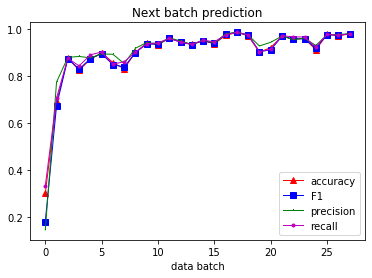

In [34]:
plot(a,['accuracy','F1','precision','recall','nodes'])

In [35]:
a[4] = ave_

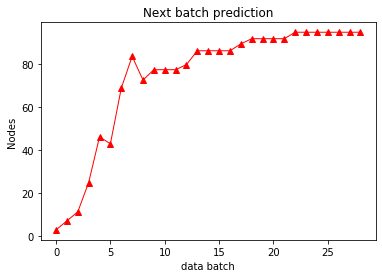

In [36]:
x = np.arange(len(a[4]))
plt.plot(x, a[4], color="r", linestyle="-", marker="^", linewidth=1)
plt.title('Next batch prediction')
plt.xlabel('data batch')
plt.ylabel('Nodes')
plt.savefig('figures_next/Sensor_pic_{}_nodes.jpg'.format(paramstamp),dpi=300)
plt.show()

In [32]:
a

[tensor([0.3020, 0.6920, 0.8760, 0.8260, 0.8720, 0.9000, 0.8580, 0.8320, 0.9020,
         0.9400, 0.9340, 0.9620, 0.9460, 0.9360, 0.9500, 0.9380, 0.9740, 0.9860,
         0.9720, 0.9020, 0.9220, 0.9700, 0.9580, 0.9600, 0.9120, 0.9780, 0.9720,
         0.9800]),
 tensor([0.1823, 0.6752, 0.8749, 0.8304, 0.8747, 0.8961, 0.8490, 0.8395, 0.9007,
         0.9380, 0.9362, 0.9608, 0.9454, 0.9341, 0.9513, 0.9404, 0.9777, 0.9867,
         0.9750, 0.9047, 0.9121, 0.9704, 0.9588, 0.9599, 0.9188, 0.9768, 0.9747,
         0.9801]),
 tensor([0.1467, 0.7757, 0.8800, 0.8843, 0.8780, 0.8949, 0.8933, 0.8539, 0.9192,
         0.9432, 0.9373, 0.9631, 0.9500, 0.9349, 0.9537, 0.9407, 0.9807, 0.9870,
         0.9751, 0.9286, 0.9444, 0.9707, 0.9558, 0.9612, 0.9309, 0.9769, 0.9777,
         0.9807]),
 tensor([0.3339, 0.7080, 0.8764, 0.8439, 0.8909, 0.9034, 0.8513, 0.8619, 0.9028,
         0.9379, 0.9422, 0.9606, 0.9455, 0.9356, 0.9531, 0.9463, 0.9762, 0.9869,
         0.9759, 0.9038, 0.9156, 0.9720, 0.9674, 0.9